In [12]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib
import os
import pandas.io.data as web
import datetime
from pandas import read_csv,Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

tf.set_random_seed(777)  # reproducibility
# np.set_printoptions(threshold=np.inf)

In [13]:
class KOSPIDATA:

    def __init__(self):
        start = datetime.datetime(1998, 5, 1)
        end = datetime.datetime(2016, 12, 31)
        kospi = web.DataReader("AAPL", "google", start, end)

        self.arr_date= np.array(kospi.index)
        self.arr_open = np.array(kospi.Open, dtype=float)
        self.arr_close= np.array(kospi.Close, dtype=float)
        self.arr_high= np.array(kospi.High, dtype=float)
        self.arr_low= np.array(kospi.Low, dtype=float)
        self.arr_volume= np.array(kospi.Volume, dtype=float)

In [14]:
# train Parameters
seq_length = 5
data_dim = 5
hidden_dim = 100
output_dim = 1
learning_rate = 0.01
iterations = 5000

In [15]:
K = KOSPIDATA()

FEATURES = ['high', 'low', 'open', 'close', 'volume']
# FEATURES = ['high', 'low', 'open', 'close']

data = {'year': K.arr_date,
        'high': K.arr_high,
        'low': K.arr_low,
        'open': K.arr_open,
        'close': K.arr_close,
        'volume' : K.arr_volume}

# df = DataFrame(data, columns=['year', 'high', 'low', 'open', 'close'])
df = DataFrame(data, columns=['year','high','low','open','close','volume'])

In [16]:
df.year

0      2001-02-06
1      2001-02-07
2      2001-02-08
3      2001-02-09
4      2001-02-12
5      2001-02-13
6      2001-02-14
7      2001-02-15
8      2001-02-16
9      2001-02-20
10     2001-02-21
11     2001-02-22
12     2001-02-23
13     2001-02-26
14     2001-02-27
15     2001-02-28
16     2001-03-01
17     2001-03-02
18     2001-03-05
19     2001-03-06
20     2001-03-07
21     2001-03-08
22     2001-03-09
23     2001-03-12
24     2001-03-13
25     2001-03-14
26     2001-03-15
27     2001-03-16
28     2001-03-19
29     2001-03-20
          ...    
3970   2016-11-17
3971   2016-11-18
3972   2016-11-21
3973   2016-11-22
3974   2016-11-23
3975   2016-11-25
3976   2016-11-28
3977   2016-11-29
3978   2016-11-30
3979   2016-12-01
3980   2016-12-02
3981   2016-12-05
3982   2016-12-06
3983   2016-12-07
3984   2016-12-08
3985   2016-12-09
3986   2016-12-12
3987   2016-12-13
3988   2016-12-14
3989   2016-12-15
3990   2016-12-16
3991   2016-12-19
3992   2016-12-20
3993   2016-12-21
3994   201

In [6]:
xy = np.array(df[FEATURES].values[:])
scaler = MinMaxScaler(feature_range=(0, 1))

x = scaler.fit_transform(xy)
pre_y = scaler.fit_transform(np.array(df['close'].values))
y = np.reshape(pre_y,(len(pre_y),1))

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [7]:
x

array([[ 0.00441617,  0.00398498,  0.00381937,  0.00431622,  0.12284764],
       [ 0.00411677,  0.00390835,  0.00411892,  0.00408905,  0.09648812],
       [ 0.00419162,  0.00406161,  0.00404404,  0.00408905,  0.15636711],
       ..., 
       [ 0.87634731,  0.88351598,  0.87313712,  0.87702559,  0.01366131],
       [ 0.86953593,  0.88504866,  0.86512394,  0.87679842,  0.00662516],
       [ 0.87020958,  0.87761514,  0.86662173,  0.86990762,  0.02527198]])

In [8]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[ 0.00441617  0.00398498  0.00381937  0.00431622  0.12284764]
 [ 0.00411677  0.00390835  0.00411892  0.00408905  0.09648812]
 [ 0.00419162  0.00406161  0.00404404  0.00408905  0.15636711]
 [ 0.00411677  0.00321864  0.00396915  0.0032561   0.16287387]
 [ 0.00366766  0.00329527  0.00322025  0.00355899  0.06887259]] -> [ 0.0032561]
[[ 0.00411677  0.00390835  0.00411892  0.00408905  0.09648812]
 [ 0.00419162  0.00406161  0.00404404  0.00408905  0.15636711]
 [ 0.00411677  0.00321864  0.00396915  0.0032561   0.16287387]
 [ 0.00366766  0.00329527  0.00322025  0.00355899  0.06887259]
 [ 0.00389222  0.00344854  0.00366959  0.0032561   0.05848864]] -> [ 0.00340754]
[[ 0.00419162  0.00406161  0.00404404  0.00408905  0.15636711]
 [ 0.00411677  0.00321864  0.00396915  0.0032561   0.16287387]
 [ 0.00366766  0.00329527  0.00322025  0.00355899  0.06887259]
 [ 0.00389222  0.00344854  0.00366959  0.0032561   0.05848864]
 [ 0.00351796  0.003142    0.00329514  0.00340754  0.07803914]] -> [ 0.00371043]
[[

In [9]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])
x_index = df.year[train_size:len(dataX)]

In [10]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [11]:
# build a LSTM network
cell = tf.nn.rnn_cell.BasicLSTMCel(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

AttributeError: module 'tensorflow.contrib.rnn' has no attribute 'BasicLSTMCell'

In [12]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [13]:
# MAE/RMSE/MAPE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
mae = tf.reduce_mean(tf.abs(targets - predictions))
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
mape = 100*tf.reduce_mean(tf.abs((targets-predictions)/targets))

[step: 0] loss: 153.1022186279297
[step: 1] loss: 32.74470138549805
[step: 2] loss: 10.571576118469238
[step: 3] loss: 7.904953956604004
[step: 4] loss: 10.92076587677002
[step: 5] loss: 2.7369697093963623
[step: 6] loss: 3.7697644233703613
[step: 7] loss: 7.346930503845215
[step: 8] loss: 2.20342755317688
[step: 9] loss: 0.3706565201282501
[step: 10] loss: 1.831632137298584
[step: 11] loss: 2.8395707607269287
[step: 12] loss: 2.487213134765625
[step: 13] loss: 1.6521507501602173
[step: 14] loss: 1.3265641927719116
[step: 15] loss: 1.6537561416625977
[step: 16] loss: 1.8785409927368164
[step: 17] loss: 1.3673557043075562
[step: 18] loss: 0.4949759542942047
[step: 19] loss: 0.09456968307495117
[step: 20] loss: 0.4019746482372284
[step: 21] loss: 0.9004203081130981
[step: 22] loss: 1.0128244161605835
[step: 23] loss: 0.7238047122955322
[step: 24] loss: 0.4638337790966034
[step: 25] loss: 0.4856931269168854
[step: 26] loss: 0.5741338133811951
[step: 27] loss: 0.45515525341033936
[step: 28

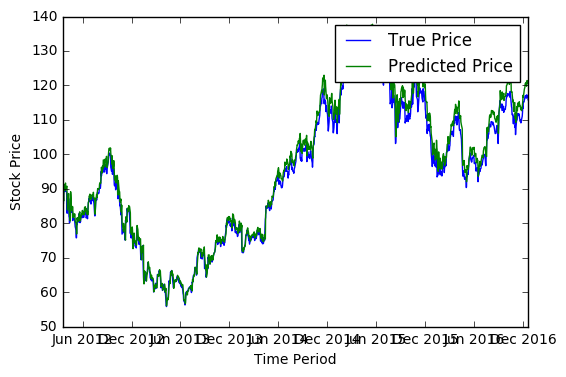

In [14]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    mae_val = sess.run(mae, feed_dict={targets: testY, predictions: test_predict})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    mape_val = sess.run(mape, feed_dict={targets: testY, predictions: test_predict})

    print("MAE: {}".format(mae_val))
    print("RMSE: {}".format(rmse_val))
    print("MAPE: {}".format(mape_val))

    new_y = scaler.inverse_transform(testY)
    new_pred_y = scaler.inverse_transform(test_predict)

    
    # Plot predictions
    
#     plt.plot(testY) -> 스케일 조정 전 아웃풋
#     plt.plot(test_predict)

    plt.plot(x_index, new_y, label= "True Price")
    plt.plot(x_index, new_pred_y, label= "Predicted Price")    
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()